In [1]:
from numpy import *
from matplotlib.pyplot import *

from sklearn.decomposition import PCA,FastICA
from matplotlib.patches import Ellipse

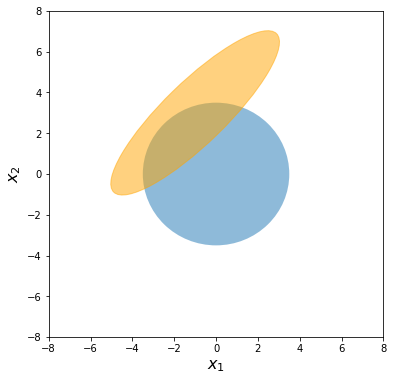

In [2]:
# generate normally distributed random numbers to fill the shape marked by the blue ellipse
# X must be a K x n matrix where K is the number of dimensions, n is the number of samples
n_samples = 37321
X = [NaN,NaN]

# transform the data into the shape marked by the orange ellipse
# Y = f(X), what should f be?
Y = X 

# bonus: can you come up with a transformation function that allows
# us to choose the mean and covariance matrix for the output?

# reminder: empirical covariance matrix Σ := (Z * Z.T) / n
# where n is the number of samples, Z is a K x n matrix
# of data where the mean has been subtracted

############################################## display results
fig = figure(figsize=(6,6))

plot(*X,'.',zorder=0)
plot(*Y,'.',zorder=0)

fig.axes[0].add_patch(Ellipse((0,0), 7,7, angle=0,  alpha=0.5))
fig.axes[0].add_patch(Ellipse((-1,3),11,3,angle=45, color='orange', alpha=0.5))

xlim(-8,8)
ylim(-8,8)
xlabel('$x_1$',fontsize=16)
ylabel('$x_2$',fontsize=16);

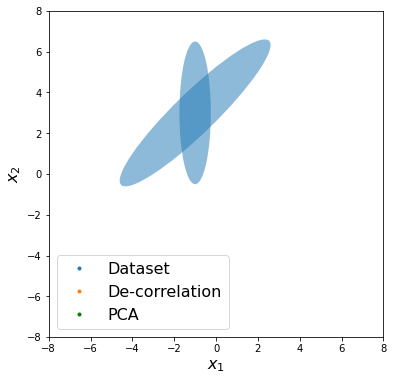

In [3]:
# lets construct a dataset to run pca/ica on;
# generate a dataset that matches the blue ellipses
n_samples = 10732
X = [NaN,NaN]

# calculate and diagonalise the covariance matrix


# use the eigenvector matrix to transform the centred data to its principal axes
# what is the result of the transformation and does it make sense?
Y = X

# lets use sklearn.decomposition.PCA to transform the data its principal axes
# do you get the same result? if not then why? try running pca multiple times
pca = PCA()
P = X

############################################## display results
fig = figure(figsize=(6,6))

plot(*X,'.',zorder=0,label='Dataset')
plot(*Y,'.',zorder=0,label='De-correlation')
plot(*P,'.',zorder=0,label="PCA", color='green')

fig.axes[0].add_patch(Ellipse((-1,3),10,2,angle=45, alpha=0.5))
fig.axes[0].add_patch(Ellipse((-1,3),1.5,7,angle=0, alpha=0.5))

xlim(-8,8)
ylim(-8,8)
xlabel('$x_1$',fontsize=16)
ylabel('$x_2$',fontsize=16)
legend(fontsize=16);

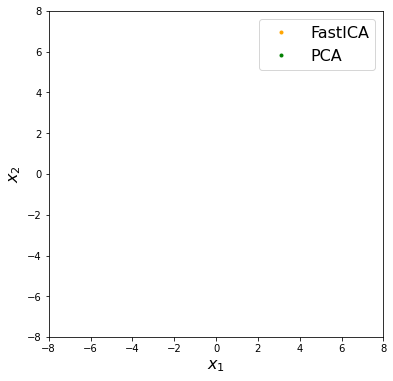

In [4]:
# lets use sklearn.decomposition.FastICA to transform the data its principal axes
# plot the results for PCA and ICA on top of each other. how are they different?

pca = PCA()
P = X

ica = FastICA()
Y = X

############################################## display results
fig = figure(figsize=(6,6))

plot(*Y,'.',label='FastICA',color='orange')
plot(*P,'.',label="PCA",color='green')

xlim(-8,8)
ylim(-8,8)
xlabel('$x_1$',fontsize=16)
ylabel('$x_2$',fontsize=16)
legend(fontsize=16);

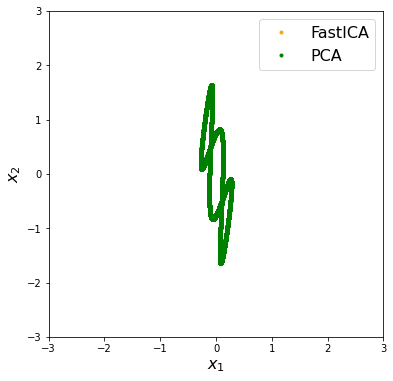

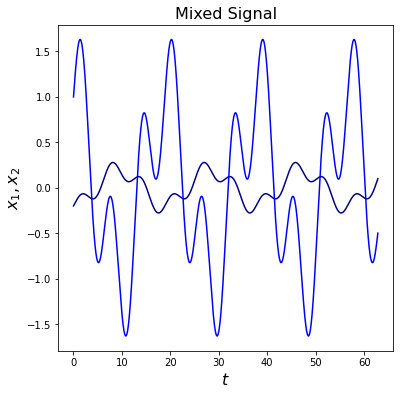

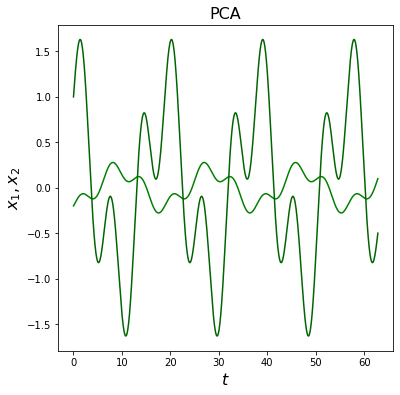

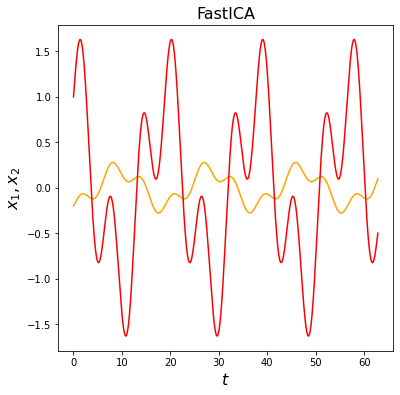

In [5]:
# lets define some independent sources
t = linspace(0,20*pi,n_samples)
Z = array([sin(t),2*cos(t/3)])

# here we mix the sources using mixing matrix W, to produce the dataset
W = array([[0.1,-0.1],[0.75,0.5]])
X = dot( W, Z )

# apply both pca and ica to this dataset, which proceedure works better and why?
pca = PCA()
P = X

ica = FastICA()
Y = X

# bonus: In the above example the number of observations channels = sources = 2
# now investigate what happens when channels < sources by adding more sources
# (the mixing matrix W will now be rectangular)

# can you choose a performance metric to give us a rough estimate of ICA's performance?
# (you know the original mixing matrix) plot the performance metric as the number of
# source increases, while the number of channels stays the same - what do you see?

# bonus: add noise sources to the mixture and watch what happens as you increase the
# amplitude. Can you come up with a pipeline that can simultaniously de-noise and
# separate independent signals?

############################################## display results
fig = figure(figsize=(6,6))

plot(*Y,'.',zorder=0,label='FastICA',color='orange')
plot(*P,'.',zorder=0,label="PCA",color='green')

xlim(-3,3)
ylim(-3,3)
xlabel('$x_1$',fontsize=16)
ylabel('$x_2$',fontsize=16)
legend(fontsize=16);

fig = figure(figsize=(6,6))
title('Mixed Signal',fontsize=16)

plot(t,X[0],'-',color='navy')
plot(t,X[1],'-',color='blue')

xlabel('$t$',fontsize=16)
ylabel('$x_1,x_2$',fontsize=16)

fig = figure(figsize=(6,6))
title('PCA',fontsize=16)

plot(t,P[0],'-',color='green')
plot(t,P[1],'-',color='darkgreen')

xlabel('$t$',fontsize=16)
ylabel('$x_1,x_2$',fontsize=16);

fig = figure(figsize=(6,6))
title('FastICA',fontsize=16)

plot(t,Y[0],'-',color='orange')
plot(t,Y[1],'-',color='red')

xlabel('$t$',fontsize=16)
ylabel('$x_1,x_2$',fontsize=16);